<a href="https://colab.research.google.com/github/kikiru328/practice_code/blob/main/FaceF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from imutils import paths
import numpy as np
import argparse
import cv2
import os
import random
from torchvision import models
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
import csv
import copy
import time
from tqdm import tqdm
import torch
import numpy as np
import os
from sklearn.metrics import roc_auc_score, f1_score
from torch.utils.data import Dataset, DataLoader
import glob
import os
import numpy as np
import cv2
import torch
from torchvision import transforms, utils
from PIL import Image

In [ ]:
# git clone https://github.com/magesh-technovator/Blog_References.git

In [1]:
import shutil
# shutil.copy('/content/drive/MyDrive/연습용코드본/Face_Segmentation/FF/headsegmentation_dataset_ccncsa.zip','/content/head.zip')

In [2]:
# shutil.unpack_archive('/content/head.zip','/content/headsegmentation_dataset_ccncsa/samples')
shutil.unpack_archive('/content/drive/MyDrive/연습용코드본/Face_Segmentation/FF/headsegmentation_dataset_ccncsa.zip','/content/headsegmentation_dataset_ccncsa/samples')

In [3]:
!mkdir '/content/code_out'
!mkdir '/content/code_out/code_1'
!mkdir '/content/code_out/code_1/code_1_1' #pwd

# Exploring

In [4]:
import os
import cv2
from PIL import Image
import json
import shutil

In [5]:
import os
import cv2
from PIL import Image
import json
import shutil
inputPath = r"../../../headsegmentation_dataset_ccncsa/samples/"
labelsPath = r"../../../headsegmentation_dataset_ccncsa/labels"
outputPath = r"../../../headsegmentation_dataset_ccncsa/samplesArranged"

In [6]:
%pwd

'/content'

In [7]:
%cd /content/code_out/code_1/code_1_1

/content/code_out/code_1/code_1_1


In [8]:
!mkdir "../../../headsegmentation_dataset_ccncsa"
!mkdir "../../../headsegmentation_dataset_ccncsa/samples/"
!mkdir "../../../headsegmentation_dataset_ccncsa/labels/"
!mkdir "../../../headsegmentation_dataset_ccncsa/samplesArranged/"

mkdir: cannot create directory ‘../../../headsegmentation_dataset_ccncsa’: File exists
mkdir: cannot create directory ‘../../../headsegmentation_dataset_ccncsa/samples/’: File exists


In [9]:
%pwd

'/content/code_out/code_1/code_1_1'

In [10]:
!rm -r '/content/samples'

rm: cannot remove '/content/samples': No such file or directory


In [11]:
import os
os.rename('/content/headsegmentation_dataset_ccncsa/samples/labels','/content/headsegmentation_dataset_ccncsa/labels')

In [12]:
labelsDist = sorted(os.listdir(labelsPath))

In [13]:
print(labelsDist)

['female03', 'female10', 'female23', 'femalealison1', 'femalealison2', 'femalebarbera', 'femalebarbera2', 'femalecarla', 'femalecarla2', 'femalefelice', 'femalejoyce', 'femalejoyce2', 'femalelaura', 'femalelaura2', 'femaleroberta', 'male01', 'male06_1', 'male06_2', 'male09', 'male23', 'maleandrew', 'maleandrew2', 'malebruce', 'malebruce2', 'malecarlos', 'malecarlos2', 'malecorry', 'malecorry2', 'maleelias', 'maleelias2', 'malegaberial', 'malegaberial2', 'malekumar', 'maleshawn', 'multiperson', 'real']


In [14]:
for folder in labelsDist:
    os.mkdir(os.path.join(outputPath, folder))

In [15]:
folderTypes = {"female": [], "male": [], "multiperson": [], "real": []}

for folder in os.listdir(inputPath):
    if folder.startswith("female"):
        folderTypes["female"].append(folder.split("_")[0])
        if os.path.isdir(os.path.join(outputPath, folderTypes["female"][-1])):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, folderTypes["female"][-1], file))
    
    elif folder.startswith("multiperson"):
        folderTypes["multiperson"].append(folder.split("_")[0])
        if os.path.isdir(os.path.join(outputPath, folderTypes["multiperson"][-1])):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, folderTypes["multiperson"][-1], file))
    
    elif folder.startswith("male"):
        
        folderTypes["male"].append(folder.split("_")[0])
        if folder.startswith("male06") and "nolight" in folder:
            outFolder = "male06_2"
        
        elif folder.startswith("male06"):
            outFolder = "male06_1"
        
        else:
            outFolder = folderTypes["male"][-1]
        if os.path.isdir(os.path.join(outputPath, outFolder)):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, outFolder, file))

    else:
        if folder.startswith("real") and os.path.isdir(os.path.join(outputPath, "real")):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, "real", file))

In [16]:
for folder in labelsDist:
    if len(os.listdir(os.path.join(labelsPath, folder))) != len(os.listdir(os.path.join(outputPath, folder))):
        print(folder, len(os.listdir(os.path.join(labelsPath, folder))), len(os.listdir(os.path.join(outputPath, folder))))

female23 501 334
femalealison1 501 167
femalealison2 501 167
femalebarbera 501 334
femalecarla 501 334
femalefelice 501 251
femalejoyce 501 334
femalelaura 501 334
male06_1 351 284
male06_2 501 393
male09 351 117
male23 501 167
maleandrew 501 334
malebruce 501 334
malecarlos 501 334
malecarlos2 501 251
malecorry 501 334
maleelias 501 333
malegaberial 501 334
maleshawn 501 334
real 2505 2500


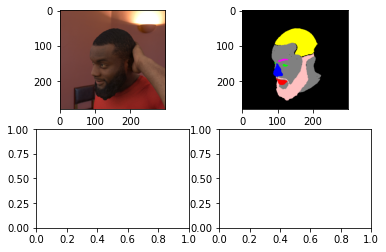

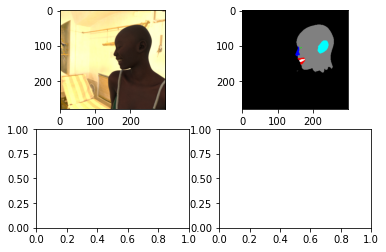

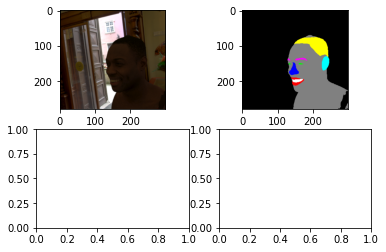

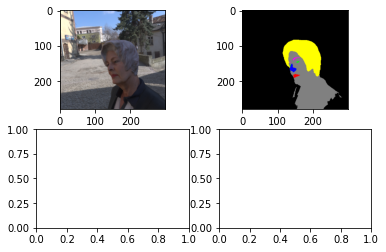

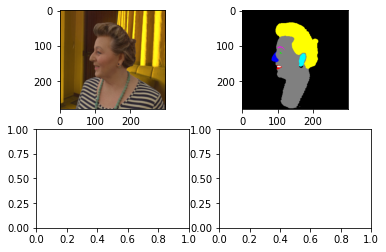

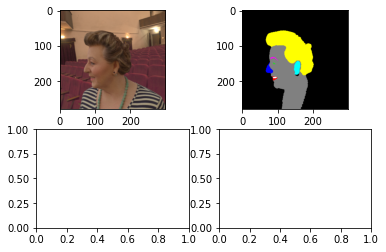

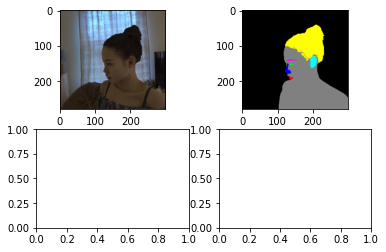

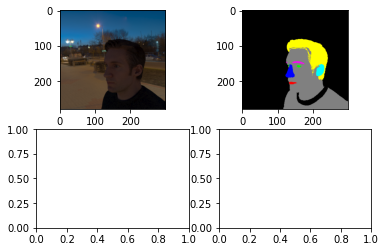

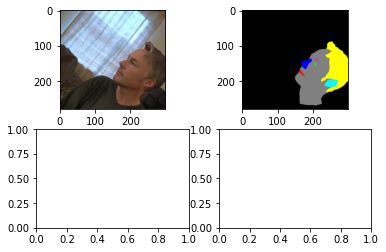

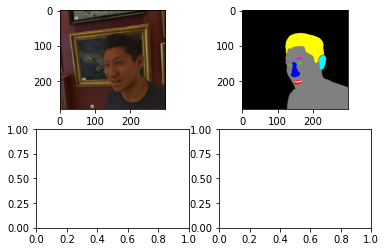

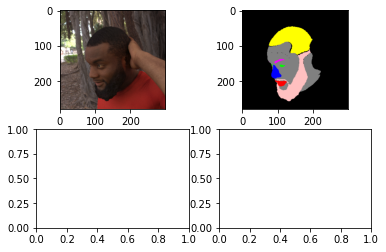

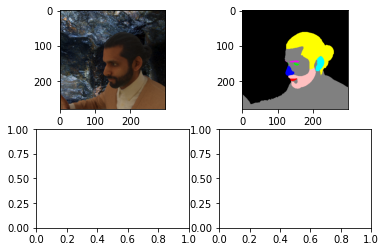

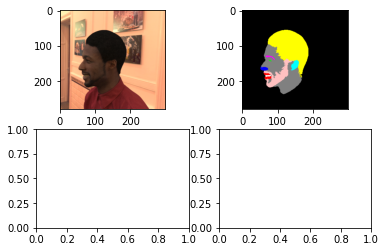

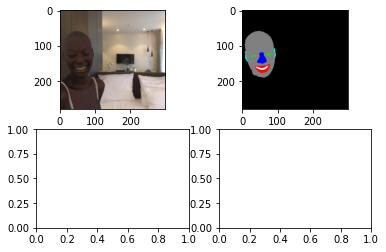

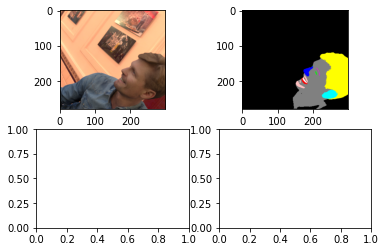

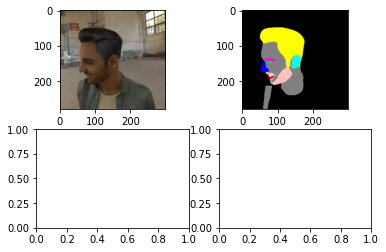

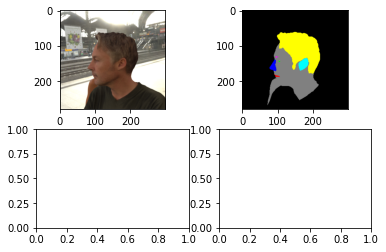

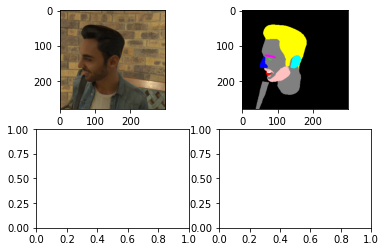

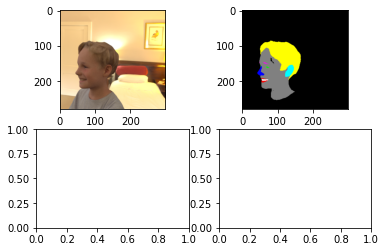

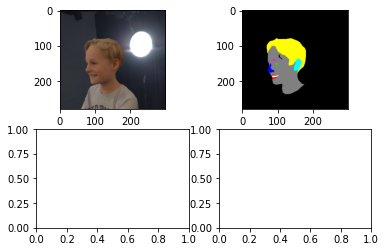

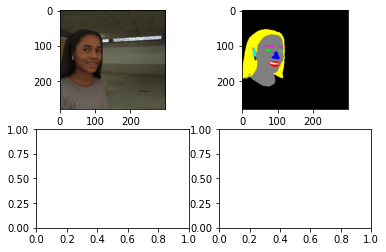

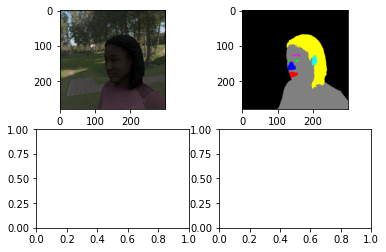

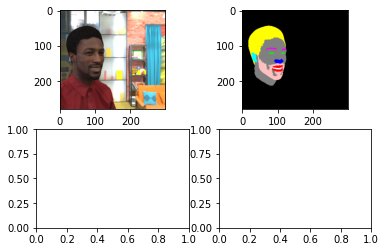

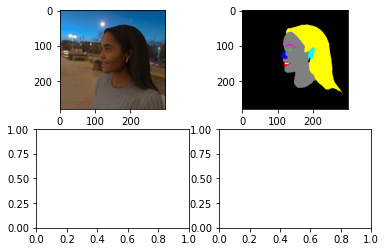

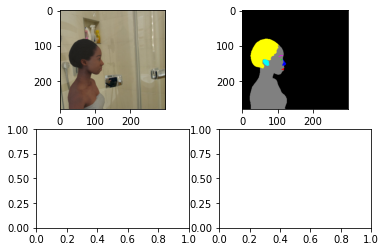

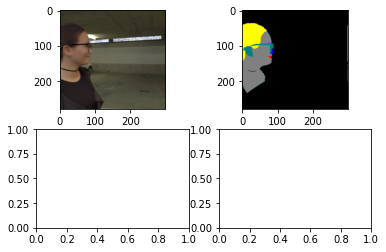

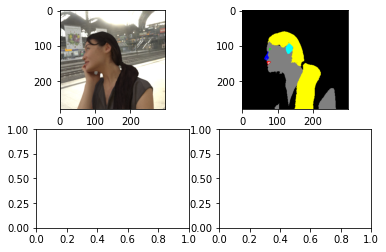

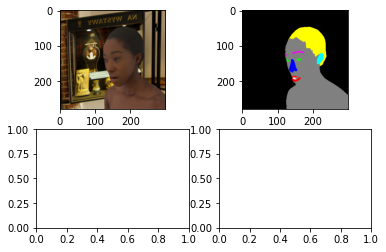

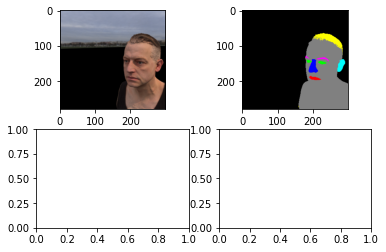

real osho_seq51672_scaled.png (239, 256) (256, 239)


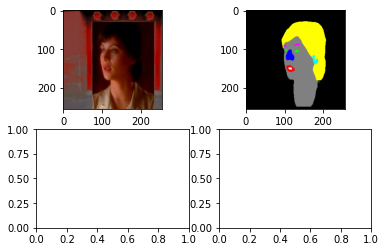

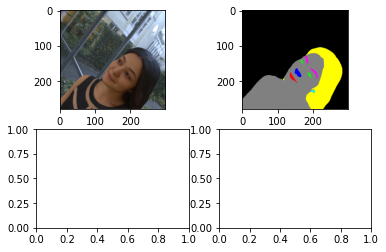

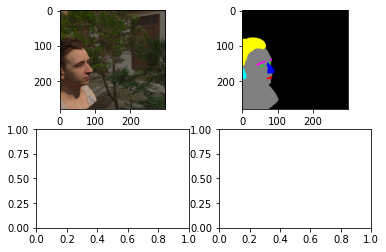

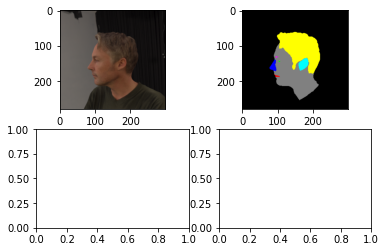

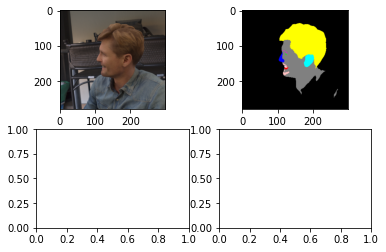

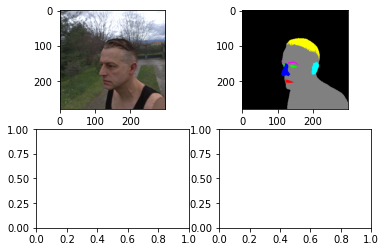

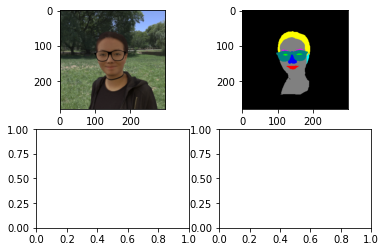

In [17]:
import matplotlib.pyplot as plt

allSamples = []
_id = 0
for folder in os.listdir(outputPath):
    for file in os.listdir(os.path.join(outputPath, folder)):
        if file in os.listdir(os.path.join(labelsPath, folder)):
            image = Image.open(os.path.join(outputPath, folder, file))
            mask = Image.open(os.path.join(labelsPath, folder, file))
            
            try:
                assert image.size == mask.size
                allSamples.append({"id": _id, "folder": folder, "Filename": file, "size": image.size})
                _id += 1
            except AssertionError:
                print(folder, file, image.size, mask.size)
    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image)
    axarr[0,1].imshow(mask)
    plt.show()

In [18]:
allSamples

[{'Filename': 'headrende0285.png',
  'folder': 'malegaberial2',
  'id': 0,
  'size': (300, 280)},
 {'Filename': 'headrende0185.png',
  'folder': 'malegaberial2',
  'id': 1,
  'size': (300, 280)},
 {'Filename': 'headrende0093.png',
  'folder': 'malegaberial2',
  'id': 2,
  'size': (300, 280)},
 {'Filename': 'headrende0055.png',
  'folder': 'malegaberial2',
  'id': 3,
  'size': (300, 280)},
 {'Filename': 'headrende0445.png',
  'folder': 'malegaberial2',
  'id': 4,
  'size': (300, 280)},
 {'Filename': 'headrende0415.png',
  'folder': 'malegaberial2',
  'id': 5,
  'size': (300, 280)},
 {'Filename': 'headrende0187.png',
  'folder': 'malegaberial2',
  'id': 6,
  'size': (300, 280)},
 {'Filename': 'headrende0069.png',
  'folder': 'malegaberial2',
  'id': 7,
  'size': (300, 280)},
 {'Filename': 'headrende0207.png',
  'folder': 'malegaberial2',
  'id': 8,
  'size': (300, 280)},
 {'Filename': 'headrende0411.png',
  'folder': 'malegaberial2',
  'id': 9,
  'size': (300, 280)},
 {'Filename': 'headr

In [19]:


dataSamples = pd.DataFrame(allSamples, columns=allSamples[0].keys())
dataSamples.to_csv("FinalSamples.csv", index=False)

In [20]:
%pwd

'/content/code_out/code_1/code_1_1'

In [21]:
finalPath = r"../../faceSegmentation/dataset/"
!mkdir "../../faceSegmentation/"
!mkdir "../../faceSegmentation/dataset/"
!mkdir "../../faceSegmentation/dataset/images"
!mkdir "../../faceSegmentation/dataset/masks"

In [22]:
for row, sample in dataSamples.iterrows():
    imagePath = os.path.join(outputPath, sample["folder"], sample["Filename"])
    maskPath = os.path.join(labelsPath, sample["folder"], sample["Filename"])
    
    shutil.copy(imagePath, os.path.join(finalPath, "images", sample["folder"] + "_" + sample["Filename"]))
    shutil.copy(maskPath, os.path.join(finalPath, "masks", sample["folder"] + "_" + sample["Filename"]))

In [23]:
print(len(os.listdir('/content/code_out/faceSegmentation/dataset/images')))
print(len(os.listdir('/content/code_out/faceSegmentation/dataset/masks')))

14598
14598


In [25]:
def dhash(image, hashSize=8):
    # convert the image to grayscale and resize the grayscale image,
    # adding a single column (width) so we can compute the horizontal
    # gradient
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (hashSize + 1, hashSize))
    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]
    # convert the difference image to a hash and return it
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [26]:
print("[INFO] computing image hashes...")
imagePaths = list(paths.list_images("/content/code_out/faceSegmentation/dataset/images"))
hashes = {}
# loop over our image paths
for imagePath in imagePaths:
    # load the input image and compute the hash
    image = cv2.imread(imagePath)
    h = dhash(image)
    # grab all image paths with that hash, add the current image
    # path to it, and store the list back in the hashes dictionary
    p = hashes.get(h, [])
    p.append(imagePath)
    hashes[h] = p

[INFO] computing image hashes...


In [27]:
hashes

{5833415627840520649: ['/content/code_out/faceSegmentation/dataset/images/malegaberial_headrende0211.png'],
 5027295386910509459: ['/content/code_out/faceSegmentation/dataset/images/femalealison2_headrende0301.png'],
 14471307682226989360: ['/content/code_out/faceSegmentation/dataset/images/femalelaura2_headrende0105.png'],
 3198913506289742330: ['/content/code_out/faceSegmentation/dataset/images/femalealison1_headrende0234.png'],
 5316510813816449076: ['/content/code_out/faceSegmentation/dataset/images/malegaberial2_headrende0253.png'],
 5848288185856169497: ['/content/code_out/faceSegmentation/dataset/images/malegaberial_headrende0406.png'],
 12597770178129706353: ['/content/code_out/faceSegmentation/dataset/images/femalelaura_headrende0351.png'],
 6965443734839230464: ['/content/code_out/faceSegmentation/dataset/images/male01_headrende0200.png'],
 12876744386865957825: ['/content/code_out/faceSegmentation/dataset/images/femalebarbera_headrende0360.png'],
 13098939978667574721: ['/co

In [28]:
remove = True
error = []
# loop over the image hashes
for (h, hashedPaths) in hashes.items():
    try:
        
        # check to see if there is more than one image with the same hash
        if len(hashedPaths) > 1:
            # check to see if this is a dry run
            if not remove:
                # initialize a montage to store all images with the same
                # hash
                montage = None
                # loop over all image paths with the same hash
                for p in hashedPaths:
                    # load the input image and resize it to a fixed width
                    # and heightG
                    image = cv2.imread(p)
                    image = cv2.resize(image, (150, 150))
                    # if our montage is None, initialize it
                    if montage is None:
                        montage = image
                    # otherwise, horizontally stack the images
                    else:
                        montage = np.hstack([montage, image])
                # show the montage for the hash
                print("[INFO] hash: {}".format(h))
                cv2.imshow("Montage", montage)
                cv2.waitKey(0)
            # otherwise, we'll be removing the duplicate images
            else:
                # loop over all image paths with the same hash *except*
                # for the first image in the list (since we want to keep
                # one, and only one, of the duplicate images)
                for p in hashedPaths[1:]:
                    os.remove(p)
                    os.remove(p.replace("/images/", "/masks/"))
    except Exception as e:
        error.append((h,hashedPaths))

In [29]:
print(len(os.listdir(os.path.join("/content/code_out/faceSegmentation/dataset/images"))))

14471


In [30]:
allFilesPath = "/content/code_out/faceSegmentation/dataset/"


subSamplesPath = "/content/code_out/faceSegmentation/dataset/subsamples/"

!mkdir "/content/code_out/faceSegmentation/dataset/subsamples/"
!mkdir "/content/code_out/faceSegmentation/dataset/subsamples/images"
!mkdir "/content/code_out/faceSegmentation/dataset/subsamples/masks"

In [31]:
oldFolders = {}

for imageFile, maskFile in zip(os.listdir(os.path.join(allFilesPath, "images")), os.listdir(os.path.join(allFilesPath, "masks"))):
    if imageFile == maskFile:
        try:
            if oldFolders.get(imageFile.split("_")[0]):
                oldFolders[imageFile.split("_")[0]] += 1
            else:
                oldFolders[imageFile.split("_")[0]] = 1
        except:
            oldFolders[imageFile.split("_")[0]] = 1
            
    else:
        print(imageFile)

In [32]:
oldFolders

{'female03': 501,
 'female10': 501,
 'female23': 334,
 'femalealison1': 167,
 'femalealison2': 167,
 'femalebarbera': 334,
 'femalebarbera2': 501,
 'femalecarla': 334,
 'femalecarla2': 501,
 'femalefelice': 251,
 'femalejoyce': 334,
 'femalejoyce2': 501,
 'femalelaura': 334,
 'femalelaura2': 501,
 'femaleroberta': 501,
 'male01': 501,
 'male06': 615,
 'male09': 109,
 'male23': 167,
 'maleandrew': 334,
 'maleandrew2': 251,
 'malebruce': 334,
 'malebruce2': 501,
 'malecarlos': 334,
 'malecarlos2': 251,
 'malecorry': 334,
 'malecorry2': 501,
 'maleelias': 333,
 'maleelias2': 501,
 'malegaberial': 334,
 'malegaberial2': 250,
 'malekumar': 501,
 'maleshawn': 334,
 'multiperson': 501,
 'real': 1723}

In [33]:
# !rm -r "/content/code_out/faceSegmentation/dataset/subsamples/"

In [34]:

error = []
addedFiles = {k: 0 for k in oldFolders.keys()}

allImages = os.listdir(os.path.join(allFilesPath, "images"))
random.shuffle(allImages)

for image in allImages:
    try:
        if image.split("_")[0] == "real" or (image.split("_")[0] == "multiperson" and addedFiles[image.split("_")[0]]<50) or addedFiles[image.split("_")[0]]<10:
            addedFiles[image.split("_")[0]] += 1
            shutil.copy(os.path.join(allFilesPath, "images", image), os.path.join(subSamplesPath, "images", image))
            shutil.copy(os.path.join(allFilesPath, "masks", image), os.path.join(subSamplesPath, "masks", image))

    except Exception as e:
        print(e)
        error.append(image)

In [35]:
len(error)

0

In [36]:
len(allImages)

14471

In [37]:
addedFiles

{'female03': 10,
 'female10': 10,
 'female23': 10,
 'femalealison1': 10,
 'femalealison2': 10,
 'femalebarbera': 10,
 'femalebarbera2': 10,
 'femalecarla': 10,
 'femalecarla2': 10,
 'femalefelice': 10,
 'femalejoyce': 10,
 'femalejoyce2': 10,
 'femalelaura': 10,
 'femalelaura2': 10,
 'femaleroberta': 10,
 'male01': 10,
 'male06': 10,
 'male09': 10,
 'male23': 10,
 'maleandrew': 10,
 'maleandrew2': 10,
 'malebruce': 10,
 'malebruce2': 10,
 'malecarlos': 10,
 'malecarlos2': 10,
 'malecorry': 10,
 'malecorry2': 10,
 'maleelias': 10,
 'maleelias2': 10,
 'malegaberial': 10,
 'malegaberial2': 10,
 'malekumar': 10,
 'maleshawn': 10,
 'multiperson': 50,
 'real': 1723}

In [38]:
newFolders = {}

for imageFile, maskFile in zip(os.listdir(os.path.join(subSamplesPath, "images")), os.listdir(os.path.join(subSamplesPath, "masks"))):
    if imageFile == maskFile:
        try:
            if newFolders.get(imageFile.split("_")[0]):
                newFolders[imageFile.split("_")[0]] += 1
            else:
                newFolders[imageFile.split("_")[0]] = 1
        except:
            newFolders[imageFile.split("_")[0]] = 1
            
    else:
        print(imageFile)

        
print("NEW DISTRIBUTION OF SAMPLES: ", len(os.listdir(os.path.join(subSamplesPath, "images"))))
print(newFolders)

NEW DISTRIBUTION OF SAMPLES:  2103
{'malegaberial': 10, 'real': 1723, 'multiperson': 50, 'female23': 10, 'femalelaura2': 10, 'malegaberial2': 10, 'maleshawn': 10, 'malebruce2': 10, 'malecarlos': 10, 'femalelaura': 10, 'maleelias': 10, 'female03': 10, 'femalebarbera2': 10, 'male23': 10, 'femalealison2': 10, 'femalejoyce': 10, 'male09': 10, 'femalefelice': 10, 'maleandrew2': 10, 'malecarlos2': 10, 'male06': 10, 'malekumar': 10, 'male01': 10, 'malebruce': 10, 'femalecarla': 10, 'female10': 10, 'femalebarbera': 10, 'femaleroberta': 10, 'femalealison1': 10, 'maleandrew': 10, 'femalecarla2': 10, 'malecorry2': 10, 'maleelias2': 10, 'femalejoyce2': 10, 'malecorry': 10}


In [39]:
newFolders

{'female03': 10,
 'female10': 10,
 'female23': 10,
 'femalealison1': 10,
 'femalealison2': 10,
 'femalebarbera': 10,
 'femalebarbera2': 10,
 'femalecarla': 10,
 'femalecarla2': 10,
 'femalefelice': 10,
 'femalejoyce': 10,
 'femalejoyce2': 10,
 'femalelaura': 10,
 'femalelaura2': 10,
 'femaleroberta': 10,
 'male01': 10,
 'male06': 10,
 'male09': 10,
 'male23': 10,
 'maleandrew': 10,
 'maleandrew2': 10,
 'malebruce': 10,
 'malebruce2': 10,
 'malecarlos': 10,
 'malecarlos2': 10,
 'malecorry': 10,
 'malecorry2': 10,
 'maleelias': 10,
 'maleelias2': 10,
 'malegaberial': 10,
 'malegaberial2': 10,
 'malekumar': 10,
 'maleshawn': 10,
 'multiperson': 50,
 'real': 1723}

In [42]:



class SegDataset(Dataset):
    """Segmentation Dataset"""

    def __init__(self, root_dir, imageFolder, maskFolder, transform=None, seed=None, fraction=None, subset=None, imagecolormode='rgb', maskcolormode='rgb'):
        """
        Args:
            root_dir (string): Directory with all the images and should have the following structure.
            root
            --Images
            -----Img 1
            -----Img N
            --Mask
            -----Mask 1
            -----Mask N
            imageFolder (string) = 'Images' : Name of the folder which contains the Images.
            maskFolder (string)  = 'Masks : Name of the folder which contains the Masks.
            transform (callable, optional): Optional transform to be applied on a sample.
            seed: Specify a seed for the train and test split
            fraction: A float value from 0 to 1 which specifies the validation split fraction
            subset: 'Train' or 'Test' to select the appropriate set.
            imagecolormode: 'rgb' or 'grayscale'
            maskcolormode: 'rgb' or 'grayscale'
        """
        self.color_dict = {'rgb': 1, 'grayscale': 0}
        assert(imagecolormode in ['rgb', 'grayscale'])
        assert(maskcolormode in ['rgb', 'grayscale'])

        self.imagecolorflag = self.color_dict[imagecolormode]
        self.maskcolorflag = self.color_dict[maskcolormode]
        self.root_dir = root_dir
        self.transform = transform
        if not fraction:
            self.image_names = sorted(
                glob.glob(os.path.join(self.root_dir, imageFolder, '*')))
            self.mask_names = sorted(
                glob.glob(os.path.join(self.root_dir, maskFolder, '*')))
        else:
            assert(subset in ['Train', 'Test'])
            self.fraction = fraction
            self.image_list = np.array(
                sorted(glob.glob(os.path.join(self.root_dir, imageFolder, '*'))))
            self.mask_list = np.array(
                sorted(glob.glob(os.path.join(self.root_dir, maskFolder, '*'))))
            if seed:
                np.random.seed(seed)
                indices = np.arange(len(self.image_list))
                np.random.shuffle(indices)
                self.image_list = self.image_list[indices]
                self.mask_list = self.mask_list[indices]
            if subset == 'Train':
                self.image_names = self.image_list[:int(
                    np.ceil(len(self.image_list)*(1-self.fraction)))]
                self.mask_names = self.mask_list[:int(
                    np.ceil(len(self.mask_list)*(1-self.fraction)))]
            else:
                self.image_names = self.image_list[int(
                    np.ceil(len(self.image_list)*(1-self.fraction))):]
                self.mask_names = self.mask_list[int(
                    np.ceil(len(self.mask_list)*(1-self.fraction))):]

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        if self.imagecolorflag:
            image = cv2.imread(
                img_name, self.imagecolorflag).transpose(2, 0, 1)
        else:
            image = cv2.imread(img_name, self.imagecolorflag)
        msk_name = self.mask_names[idx]
        if self.maskcolorflag:
            mask = cv2.imread(msk_name, self.maskcolorflag).transpose(2, 0, 1)
        else:
            mask = cv2.imread(msk_name, self.maskcolorflag)
        sample = {'image': image, 'mask': mask}

        if self.transform:
            sample = self.transform(sample)

        return sample
      
class Resize(object):
    """Resize image and/or masks."""

    def __init__(self, imageresize, maskresize):
        self.imageresize = imageresize
        self.maskresize = maskresize

    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        if len(image.shape) == 3:
            image = image.transpose(1, 2, 0)
        if len(mask.shape) == 3:
            mask = mask.transpose(1, 2, 0)
        mask = cv2.resize(mask, self.maskresize, cv2.INTER_AREA)
        image = cv2.resize(image, self.imageresize, cv2.INTER_AREA)
        
        if len(image.shape) == 3:
           image = image.transpose(2, 0, 1)
        if len(mask.shape) == 3:
           mask = mask.transpose(2, 0, 1)

        return {'image': image,
                'mask': mask}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample, maskresize=None, imageresize=None):
        image, mask = sample['image'], sample['mask']
        if len(mask.shape) == 2:
            mask = mask.reshape((1,)+mask.shape)
        if len(image.shape) == 2:
            image = image.reshape((1,)+image.shape)
        return {'image': torch.from_numpy(image),
                'mask': torch.from_numpy(mask)}


class Normalize(object):
    '''Normalize image'''

    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        return {'image': image.type(torch.FloatTensor)/255,
                'mask': mask.type(torch.FloatTensor)/255}



def get_dataloader_single_folder(data_dir, imageFolder='Images', maskFolder='Masks', fraction=0.2, batch_size=4):
    """
        Create training and testing dataloaders from a single folder.
    """
    data_transforms = {
        'Train': transforms.Compose([Resize((256, 256), (256, 256)), ToTensor(), Normalize()]),
        'Test': transforms.Compose([Resize((256, 256), (256, 256)), ToTensor(), Normalize()]),
    }

    image_datasets = {x: SegDataset(data_dir, imageFolder=imageFolder, maskFolder=maskFolder, seed=100, fraction=fraction, subset=x, transform=data_transforms[x])
                      for x in ['Train', 'Test']}
    dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size,
                                 shuffle=True, num_workers=8)
                   for x in ['Train', 'Test']}
    return dataloaders

In [150]:
dataloaders = get_dataloader_single_folder(
    data_dir = subSamplesPath,
    imageFolder = 'images',
    maskFolder = 'masks',
    fraction = 0.2,
    batch_size = 4
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [45]:
dataloaders

{'Test': <torch.utils.data.dataloader.DataLoader at 0x7f9605bd9990>,
 'Train': <torch.utils.data.dataloader.DataLoader at 0x7f9605c723d0>}

In [46]:
from torchvision import models
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
import csv
import copy
import time
from tqdm import tqdm
import torch
import numpy as np
import os
from sklearn.metrics import roc_auc_score, f1_score

def createDeepLabv3(outputchannels=1):
    model = models.segmentation.deeplabv3_resnet101(
        pretrained=True, progress=True)
    # Added a Tanh activation after the last convolution layer
    model.classifier = DeepLabHead(2048, outputchannels)
    # Set the model in training mode
    model.train()
    return model
  
model = createDeepLabv3(3)

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [47]:


def train_model(model, criterion, dataloaders, optimizer, metrics, bpath, num_epochs=3):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10
    # Use gpu if available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    # Initialize the log file for training and testing loss and metrics
    fieldnames = ['epoch', 'Train_loss', 'Test_loss'] + \
        [f'Train_{m}' for m in metrics.keys()] + \
        [f'Test_{m}' for m in metrics.keys()]
    with open(os.path.join(bpath, 'log.csv'), 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

    for epoch in range(1, num_epochs+1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)
        # Each epoch has a training and validation phase
        # Initialize batch summary
        batchsummary = {a: [0] for a in fieldnames}

        for phase in ['Train', 'Test']:
            if phase == 'Train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            # Iterate over data.
            for sample in tqdm(iter(dataloaders[phase])):
                inputs = sample['image'].to(device)
                masks = sample['mask'].to(device)
                # zero the parameter gradients
                optimizer.zero_grad()

                # track history if only in train
                with torch.set_grad_enabled(phase == 'Train'):
                    outputs = model(inputs)
                    loss = criterion(outputs['out'], masks)
                    y_pred = outputs['out'].data.cpu().numpy().ravel()
                    y_true = masks.data.cpu().numpy().ravel()
                    for name, metric in metrics.items():
                        if name == 'f1_score':
                            # Use a classification threshold of 0.1
                            batchsummary[f'{phase}_{name}'].append(
                                metric(y_true > 0, y_pred > 0.1))
                        else:
                            batchsummary[f'{phase}_{name}'].append(
                                metric(y_true.astype('uint8'), y_pred))

                    # backward + optimize only if in training phase
                    if phase == 'Train':
                        loss.backward()
                        optimizer.step()
            batchsummary['epoch'] = epoch
            epoch_loss = loss
            batchsummary[f'{phase}_loss'] = epoch_loss.item()
            print('{} Loss: {:.4f}'.format(
                phase, loss))
        for field in fieldnames[3:]:
            batchsummary[field] = np.mean(batchsummary[field])
        print(batchsummary)
        with open(os.path.join(bpath, 'log.csv'), 'a', newline='') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writerow(batchsummary)
            # deep copy the model
            if phase == 'Test' and loss < best_loss:
                best_loss = loss
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Lowest Loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [151]:


epochs = 30
bpath = "../exp/"
# dataloaders = get_dataloader_single_folder(data_dir, imageFolder='images', maskFolder='masks', fraction=0.2, batch_size=batchsize)
# Specify the loss function
criterion = torch.nn.MSELoss(reduction='mean')
# Specify the optimizer with a lower learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Specify the evalutation metrics
metrics = {'f1_score': f1_score, 'auroc': roc_auc_score}

trained_model = train_model(model, criterion, dataloaders,optimizer, bpath=bpath, metrics=metrics, num_epochs=epochs)

torch.save(trained_model, os.path.join(bpath, 'weights.pt'))

Epoch 1/30
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:18<00:00,  1.32it/s]

Train Loss: 0.0240



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.84it/s]

Test Loss: 0.0518
{'epoch': 1, 'Train_loss': 0.023958589881658554, 'Test_loss': 0.051767051219940186, 'Train_f1_score': 0.9104875630929575, 'Train_auroc': 0.9829590187356396, 'Test_f1_score': 0.774885585396883, 'Test_auroc': 0.9426066035159214}
Epoch 2/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:18<00:00,  1.32it/s]

Train Loss: 0.0163



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.84it/s]

Test Loss: 0.0247
{'epoch': 2, 'Train_loss': 0.016255276277661324, 'Test_loss': 0.024661799892783165, 'Train_f1_score': 0.9161165498106615, 'Train_auroc': 0.9830102853834656, 'Test_f1_score': 0.7815182926020425, 'Test_auroc': 0.9572060741810228}
Epoch 3/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0123



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0297
{'epoch': 3, 'Train_loss': 0.012259247712790966, 'Test_loss': 0.029736142605543137, 'Train_f1_score': 0.9175740727204541, 'Train_auroc': 0.9835160121649915, 'Test_f1_score': 0.7669538669691436, 'Test_auroc': 0.9530412044082281}
Epoch 4/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0071



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0319
{'epoch': 4, 'Train_loss': 0.007103069219738245, 'Test_loss': 0.03185560554265976, 'Train_f1_score': 0.914345396080657, 'Train_auroc': 0.9847426871025363, 'Test_f1_score': 0.7707387669997643, 'Test_auroc': 0.9458588522290535}
Epoch 5/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.32it/s]

Train Loss: 0.0133



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0481
{'epoch': 5, 'Train_loss': 0.013260056264698505, 'Test_loss': 0.04807227849960327, 'Train_f1_score': 0.926219488005477, 'Train_auroc': 0.9861733297327951, 'Test_f1_score': 0.7817604891358803, 'Test_auroc': 0.9494532119368957}
Epoch 6/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0084



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0586
{'epoch': 6, 'Train_loss': 0.008381926454603672, 'Test_loss': 0.058606430888175964, 'Train_f1_score': 0.9271997213307733, 'Train_auroc': 0.9867445262415383, 'Test_f1_score': 0.7809030378910443, 'Test_auroc': 0.9518334004133385}
Epoch 7/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0087



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0537
{'epoch': 7, 'Train_loss': 0.008720804937183857, 'Test_loss': 0.05373016744852066, 'Train_f1_score': 0.9291404220089098, 'Train_auroc': 0.9870447904406571, 'Test_f1_score': 0.7931646217481536, 'Test_auroc': 0.9528941984846583}
Epoch 8/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0084



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0733
{'epoch': 8, 'Train_loss': 0.008394905366003513, 'Test_loss': 0.0732581838965416, 'Train_f1_score': 0.9348788856203543, 'Train_auroc': 0.9877354014193696, 'Test_f1_score': 0.7920845049356746, 'Test_auroc': 0.9509301612589715}
Epoch 9/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0084



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0481
{'epoch': 9, 'Train_loss': 0.008446859195828438, 'Test_loss': 0.04806608706712723, 'Train_f1_score': 0.9368077919668197, 'Train_auroc': 0.98836978925281, 'Test_f1_score': 0.7905614947703318, 'Test_auroc': 0.9552892507842479}
Epoch 10/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:18<00:00,  1.32it/s]

Train Loss: 0.0076



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.84it/s]

Test Loss: 0.0343
{'epoch': 10, 'Train_loss': 0.007571909110993147, 'Test_loss': 0.034302689135074615, 'Train_f1_score': 0.937891637264193, 'Train_auroc': 0.9888885927408398, 'Test_f1_score': 0.7906904051182384, 'Test_auroc': 0.9492554845882971}
Epoch 11/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.32it/s]

Train Loss: 0.0068



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0146
{'epoch': 11, 'Train_loss': 0.006830547470599413, 'Test_loss': 0.01462198980152607, 'Train_f1_score': 0.9395603448490499, 'Train_auroc': 0.9891558892838838, 'Test_f1_score': 0.7945596378143749, 'Test_auroc': 0.9524652502845917}
Epoch 12/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0207



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0413
{'epoch': 12, 'Train_loss': 0.020670128986239433, 'Test_loss': 0.041349902749061584, 'Train_f1_score': 0.9360599125385627, 'Train_auroc': 0.988443101060932, 'Test_f1_score': 0.7854845292930482, 'Test_auroc': 0.945807413183278}
Epoch 13/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0113



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.84it/s]

Test Loss: 0.0208
{'epoch': 13, 'Train_loss': 0.011275271885097027, 'Test_loss': 0.020830508321523666, 'Train_f1_score': 0.8601935536433156, 'Train_auroc': 0.9720284737781364, 'Test_f1_score': 0.774317996319972, 'Test_auroc': 0.9467994040401628}
Epoch 14/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:16<00:00,  1.33it/s]

Train Loss: 0.0063



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0487
{'epoch': 14, 'Train_loss': 0.006289386656135321, 'Test_loss': 0.04872776195406914, 'Train_f1_score': 0.9160788296711342, 'Train_auroc': 0.9845291926334016, 'Test_f1_score': 0.7768160942722971, 'Test_auroc': 0.9487290364078057}
Epoch 15/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0111



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.84it/s]

Test Loss: 0.0490
{'epoch': 15, 'Train_loss': 0.011082089506089687, 'Test_loss': 0.04897581785917282, 'Train_f1_score': 0.9308059139696134, 'Train_auroc': 0.9874558367399459, 'Test_f1_score': 0.7926248910053177, 'Test_auroc': 0.9492081200109086}
Epoch 16/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0074



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0413
{'epoch': 16, 'Train_loss': 0.0073982179164886475, 'Test_loss': 0.04132799804210663, 'Train_f1_score': 0.9357355012296907, 'Train_auroc': 0.9884445317195544, 'Test_f1_score': 0.7873430444550731, 'Test_auroc': 0.9458151436634429}
Epoch 17/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0050



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0500
{'epoch': 17, 'Train_loss': 0.004964205902069807, 'Test_loss': 0.049989886581897736, 'Train_f1_score': 0.9391675852316617, 'Train_auroc': 0.9891157442757322, 'Test_f1_score': 0.790879697969883, 'Test_auroc': 0.9545058555519249}
Epoch 18/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0074



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.84it/s]

Test Loss: 0.0646
{'epoch': 18, 'Train_loss': 0.007367177400738001, 'Test_loss': 0.06456150114536285, 'Train_f1_score': 0.9409959056449806, 'Train_auroc': 0.9895860903974195, 'Test_f1_score': 0.7897345201324977, 'Test_auroc': 0.9476572754917181}
Epoch 19/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0079



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.83it/s]

Test Loss: 0.0474
{'epoch': 19, 'Train_loss': 0.007916531525552273, 'Test_loss': 0.04740891978144646, 'Train_f1_score': 0.9415755307000045, 'Train_auroc': 0.9898024448719274, 'Test_f1_score': 0.7853585048725135, 'Test_auroc': 0.9473135396856441}
Epoch 20/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0077



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0378
{'epoch': 20, 'Train_loss': 0.007733818609267473, 'Test_loss': 0.037763938307762146, 'Train_f1_score': 0.9414005706050693, 'Train_auroc': 0.9900041666328159, 'Test_f1_score': 0.7932856488385639, 'Test_auroc': 0.9506536943749606}
Epoch 21/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:17<00:00,  1.33it/s]

Train Loss: 0.0053



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.85it/s]

Test Loss: 0.0332
{'epoch': 21, 'Train_loss': 0.005337547045201063, 'Test_loss': 0.03320358321070671, 'Train_f1_score': 0.938891498081192, 'Train_auroc': 0.9888278043694154, 'Test_f1_score': 0.7788796471777105, 'Test_auroc': 0.9450739392028715}
Epoch 22/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:16<00:00,  1.33it/s]

Train Loss: 0.0367



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.86it/s]

Test Loss: 0.0456
{'epoch': 22, 'Train_loss': 0.03666450455784798, 'Test_loss': 0.04560309648513794, 'Train_f1_score': 0.9128444705646657, 'Train_auroc': 0.9818375500445068, 'Test_f1_score': 0.7659736431981335, 'Test_auroc': 0.9466627685396152}
Epoch 23/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:16<00:00,  1.33it/s]

Train Loss: 0.0284



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:56<00:00,  1.86it/s]

Test Loss: 0.0339
{'epoch': 23, 'Train_loss': 0.02840595878660679, 'Test_loss': 0.033887218683958054, 'Train_f1_score': 0.894620761817738, 'Train_auroc': 0.9797093796740126, 'Test_f1_score': 0.7713408219775767, 'Test_auroc': 0.9474840366403139}
Epoch 24/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:18<00:00,  1.32it/s]

Train Loss: 0.0089



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.84it/s]

Test Loss: 0.0403
{'epoch': 24, 'Train_loss': 0.008857357315719128, 'Test_loss': 0.04029207304120064, 'Train_f1_score': 0.924354360558754, 'Train_auroc': 0.9860859140530042, 'Test_f1_score': 0.7876972368665909, 'Test_auroc': 0.9470474711044582}
Epoch 25/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:19<00:00,  1.32it/s]

Train Loss: 0.0098



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.82it/s]

Test Loss: 0.0421
{'epoch': 25, 'Train_loss': 0.009754245169460773, 'Test_loss': 0.04209569841623306, 'Train_f1_score': 0.936263257333377, 'Train_auroc': 0.9886025367138334, 'Test_f1_score': 0.7943951191313925, 'Test_auroc': 0.9503438542708841}
Epoch 26/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:19<00:00,  1.32it/s]

Train Loss: 0.0136



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.83it/s]

Test Loss: 0.0125
{'epoch': 26, 'Train_loss': 0.013627267442643642, 'Test_loss': 0.012481044046580791, 'Train_f1_score': 0.9401317975285022, 'Train_auroc': 0.9893445097829393, 'Test_f1_score': 0.7857831071355014, 'Test_auroc': 0.9543251390260179}
Epoch 27/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:19<00:00,  1.32it/s]

Train Loss: 0.0070



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.82it/s]

Test Loss: 0.0340
{'epoch': 27, 'Train_loss': 0.006973854266107082, 'Test_loss': 0.03404153510928154, 'Train_f1_score': 0.9416105151745862, 'Train_auroc': 0.9898421851079592, 'Test_f1_score': 0.7928864600533007, 'Test_auroc': 0.9508710739247872}
Epoch 28/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:20<00:00,  1.32it/s]

Train Loss: 0.0091



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.82it/s]

Test Loss: 0.0462
{'epoch': 28, 'Train_loss': 0.0091311726719141, 'Test_loss': 0.04615403711795807, 'Train_f1_score': 0.9417695098286377, 'Train_auroc': 0.9900600590156741, 'Test_f1_score': 0.7905225653284769, 'Test_auroc': 0.9529447409511514}
Epoch 29/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:19<00:00,  1.32it/s]

Train Loss: 0.0067



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.82it/s]

Test Loss: 0.0300
{'epoch': 29, 'Train_loss': 0.006733814720064402, 'Test_loss': 0.029986580833792686, 'Train_f1_score': 0.9429160498934378, 'Train_auroc': 0.990258259930124, 'Test_f1_score': 0.7883848956372375, 'Test_auroc': 0.953328887913618}
Epoch 30/30
----------



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 421/421 [05:20<00:00,  1.31it/s]

Train Loss: 0.0093



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 105/105 [00:57<00:00,  1.83it/s]


Test Loss: 0.0095
{'epoch': 30, 'Train_loss': 0.009266515262424946, 'Test_loss': 0.009462010115385056, 'Train_f1_score': 0.9429160311950453, 'Train_auroc': 0.9905691253219553, 'Test_f1_score': 0.7931508895679114, 'Test_auroc': 0.9517851185911528}
Training complete in 187m 49s
Lowest Loss: 0.009462


# inference

In [152]:
import torch
from matplotlib import pyplot as plt
import cv2
import pandas as pd

In [153]:
print(torch.__version__)

1.10.0+cu111


In [154]:
model = torch.load('/content/code_out/code_1/exp/weights.pt',
                   map_location = torch.device('cpu'))
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [155]:
originalImage = cv2.imread("/content/code_out/faceSegmentation/dataset/subsamples/images/female03_headrende0056.png")

# Resize image
img = cv2.resize(originalImage, (256, 256), cv2.INTER_AREA).transpose(2,0,1)

# Uncomment above line and use the below one for inference with original image size
img = originalImage.transpose(2,0,1)

img = img.reshape(1, 3, img.shape[1],img.shape[2])

mask = cv2.imread("/content/code_out/faceSegmentation/dataset/subsamples/masks/female03_headrende0056.png")
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.FloatTensor)/255)

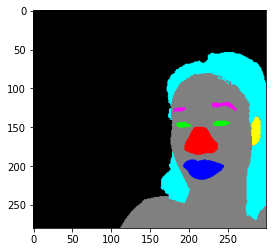

In [156]:
plt.imshow(cv2.imread('/content/code_out/faceSegmentation/dataset/subsamples/masks/female03_headrende0056.png'))

(array([  1585., 169067.,   5224.,   5329.,  39293.,   9705.,   4088.,
          4812.,  12225.,    672.]),
 array([-0.20322436, -0.05944577,  0.08433282,  0.22811142,  0.37189   ,
         0.51566863,  0.6594472 ,  0.80322576,  0.9470044 ,  1.090783  ,
         1.2345616 ], dtype=float32),
 <a list of 10 Patch objects>)

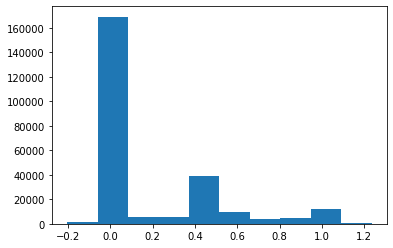

In [157]:
plt.hist(a['out'].data.cpu().numpy().flatten())

In [158]:
import numpy as np

def interval_mapping(image, from_min, from_max, to_min, to_max):
    # map values from [from_min, from_max] to [to_min, to_max]
    # image: input array
    from_range = from_max - from_min
    to_range = to_max - to_min
    scaled = np.array((image - from_min) / float(from_range), dtype=float)
    return to_min + (scaled * to_range)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


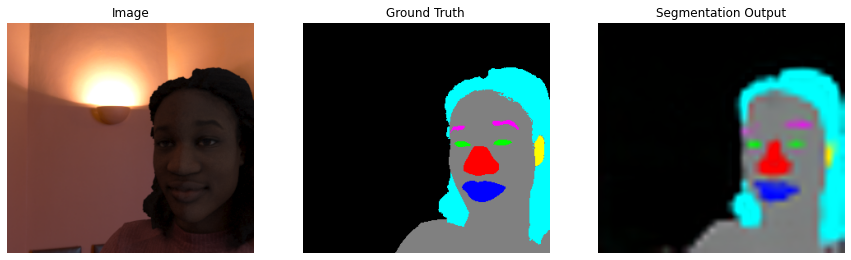

In [159]:
plt.figure(figsize=(15,15));
plt.subplot(131);

image = cv2.cvtColor(img[0].transpose(1,2,0), cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="viridis");
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask, cmap="jet");
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);

from matplotlib import colors, cm

outImage = a['out'].cpu().detach().numpy()[0]
# norm = colors.LogNorm(outImage.mean() + 0.5 * outImage.std(), outImage.max(), clip=True)

# outImage = interval_mapping(outImage, outImage.min(), outImage.max(), 0, 255)
plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation Output')
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


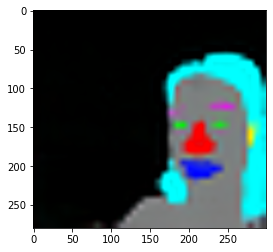

In [173]:
mask = outImage.transpose(1,2,0)
plt.imshow(mask)

In [169]:
image.shape

(280, 300, 3)

In [170]:
mask_ = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask_.shape

(280, 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


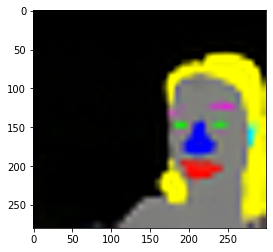

In [174]:
mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
plt.imshow(mask)

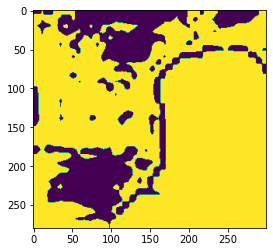

In [189]:
gray= cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
G , x = cv2.threshold(gray, 0,1,cv2.THRESH_BINARY)
plt.imshow(x)

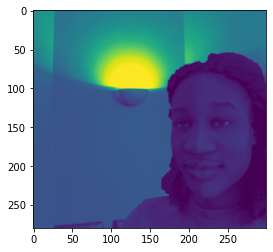

In [164]:
image_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_)

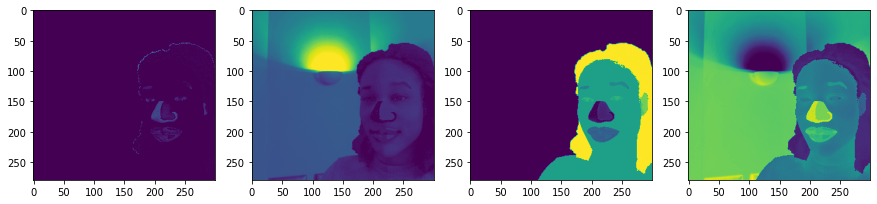

In [119]:
masked_o = cv2.bitwise_and(image_, mask_)
masked_m = cv2.bitwise_and(image_, ~mask_)
masked_i = cv2.bitwise_and(~image_, mask_)
masked_b = cv2.bitwise_and(~image_, ~mask_)

plt.figure(figsize=(15,15))
plt.subplot(141)
plt.imshow(masked_o)
plt.subplot(142)
plt.imshow(masked_m)
plt.subplot(143)
plt.imshow(masked_i)
plt.subplot(144)
plt.imshow(masked_b)

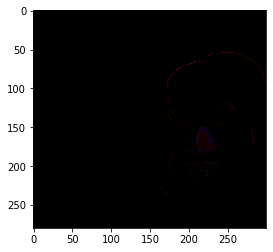

In [138]:
plt.imshow(cv2.cvtColor(masked_i,cv2.COLOR_GRAY2BGR))

a = cv2.cvtColor(masked_i,cv2.COLOR_GRAY2BGR)

a.shape
# plt.imshow(cv2.cvtColor(masked,cv2.COLOR_GRAY2BGR))
# plt.imshow(cv2.cvtColor(masked,cv2.COLOR_GRAY2BGR))
AA = cv2.bitwise_and(image, a)
plt.imshow(AA)

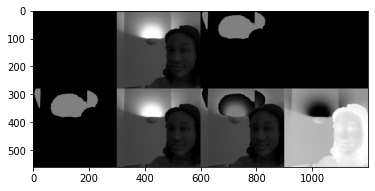

In [145]:
import numpy as np
import cv2

# src = cv2.imread("analysis.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 128, cv2.THRESH_BINARY)

_and = cv2.bitwise_and(gray, binary)
_or = cv2.bitwise_or(gray, binary)
_xor = cv2.bitwise_xor(gray, binary)
_not = cv2.bitwise_not(gray)

src = np.concatenate((np.zeros_like(gray), gray, binary, np.zeros_like(gray)), axis = 1)
dst = np.concatenate((_and, _or, _xor, _not), axis = 1)
dst = np.concatenate((src, dst), axis = 0)

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_GRAY2BGR))

In [190]:
import shutil

shutil.copytree('/content/code_out/code_1/exp','/content/drive/MyDrive/연습용코드본/EXP/second')

'/content/drive/MyDrive/연습용코드본/EXP/second'

In [139]:
a


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]]

In [ ]:
https://medium.com/technovators/semantic-segmentation-using-deeplabv3-ce68621e139e
https://github.com/magesh-technovator/Blog_References/blob/master/face-segmentation/training/main.py